In [7]:
include("LiPoSID.jl")
using QuantumOptics
using LinearAlgebra
using Plots
using Random

function timeevolution_kraus(t_span, ρ₀, K)
    ρ = [ρ₀]
    for t = 2:length(t_span)
        push!(ρ, Hermitian(sum([K[i]* ρ[end] * K[i]' for i = 1:length(K)])))
    end
    return ρ
end  

function rand_Kraus_w_noise(seed, w, time_span)
    Random.seed!(seed)
    
    ρ₀ = LiPoSID.rand_dm(2)       

    K1 = rand(2,2) + im*rand(2,2)
    K2 = rand(2,2) + im*rand(2,2)
    
    ρ_exact = timeevolution_kraus(time_span, ρ₀, [K1, K2])
    
    ρ = [ (1 - w) * ρₜ + w * LiPoSID.rand_dm(2) for ρₜ in ρ_exact ]
end

rand_Kraus_w_noise (generic function with 1 method)

ComplexF64[3.138384404390897 + 0.0im 1.738041751166632 - 0.5951299856894998im; 1.738041751166632 + 0.5951299856894998im 2.578279761924513 + 0.0im]


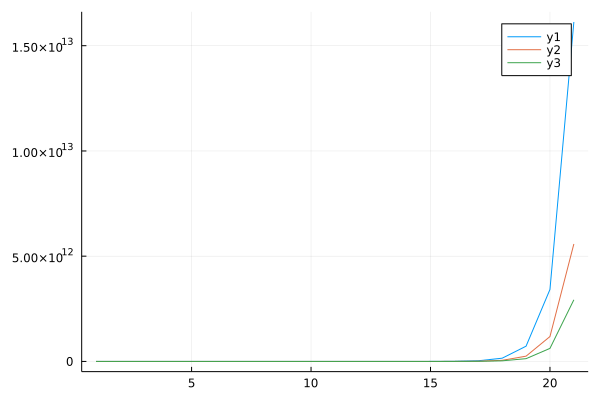

In [34]:
tₘₐₓ = 1. # maximum time 
Δt = 0.05     # time step
time_span = [0:Δt:tₘₐₓ;] # time span

Random.seed!(19990)

ρ₀ = LiPoSID.rand_dm(2)       

K1 = rand(2,2) + im*rand(2,2)
K2 = sqrt(I - K1'*K1)


K_list = [K1, K2]
        
ρ = timeevolution_kraus(time_span, ρ₀, K_list);

plot(LiPoSID.bloch(ρ)')

In [13]:
typeof(ρ₀)

Hermitian{ComplexF64, Matrix{ComplexF64}}

In [14]:
typeof(K1)

Matrix{ComplexF64} (alias for Array{Complex{Float64}, 2})

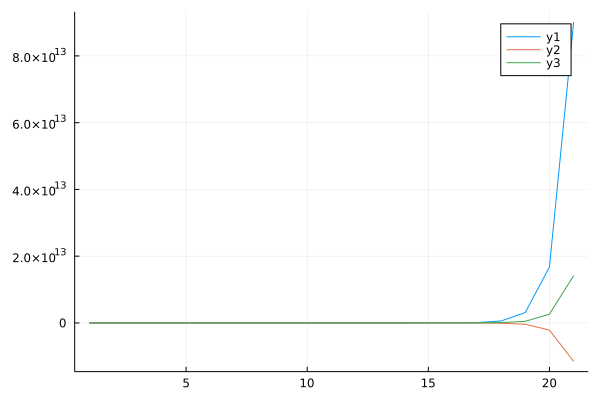

In [15]:
plot(LiPoSID.bloch(ρ)')

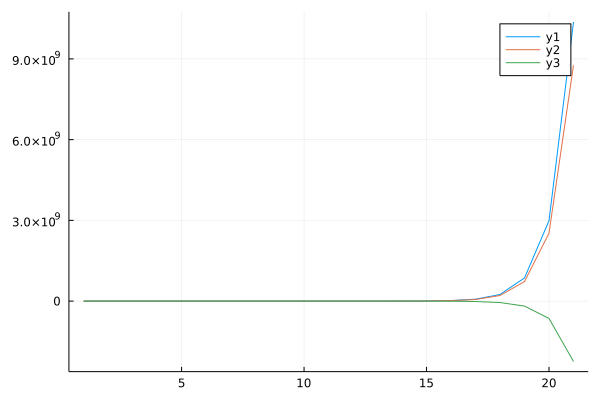

In [6]:
seed = 1000
w = 0.01
ρ2 = rand_Kraus_w_noise(seed, w, time_span)
plot(LiPoSID.bloch(ρ2)')